### **Task - 2 : Predicting optimum number of cluster and visualizing it by clustering model**
## **Unsupervised Machine learning**

![image](https://www.oreilly.com/library/view/python-artificial-intelligence/9781789539462/assets/462dc4fa-fd62-4539-8599-ac80a441382c.png)

* DATA-IRIS DATASET

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [3]:
df=data.drop('Id',axis='columns')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


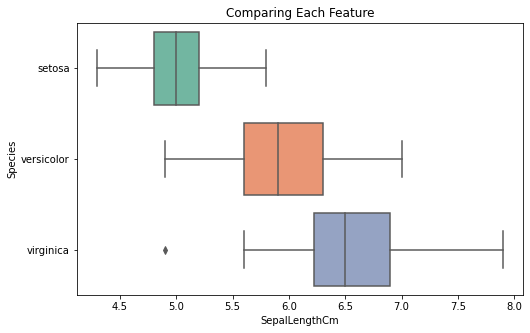

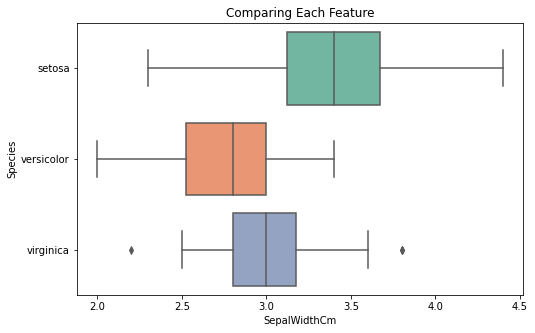

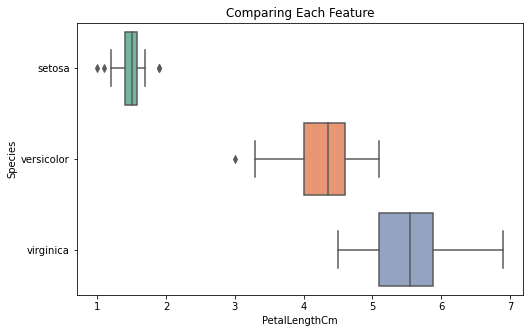

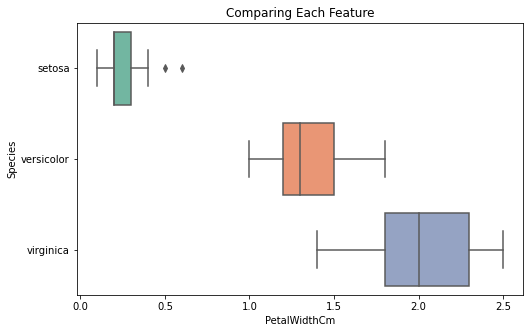

In [4]:
def box(df):
    for column in df.columns:
        if df[column].dtypes=='float64':
            plt.figure(figsize=(8,5))
            sns.boxplot(x=df[column],y='Species',data=df,palette='Set2')
            plt.title('Comparing Each Feature')
            plt.show()
    return
box(df)

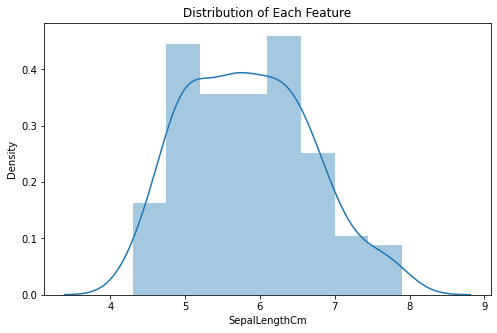

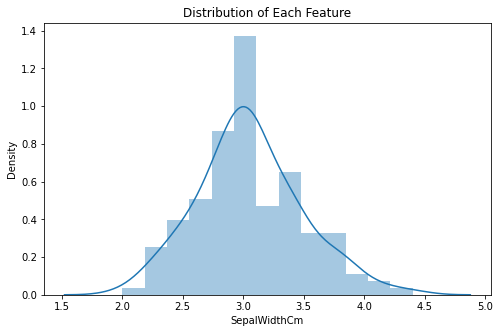

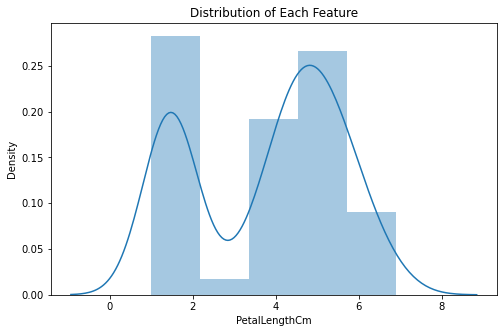

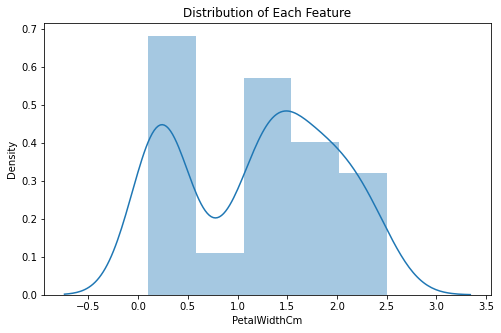

In [5]:
def distribution(df):
    for column in df.columns:
        if df[column].dtypes=='float64':
            plt.figure(figsize=(8,5))
            sns.distplot(df[column])
            plt.title('Distribution of Each Feature')
            plt.show()
    return       
distribution(df)

Text(0.5, 1.0, 'Comparision of PetalWidth and PetalLength')

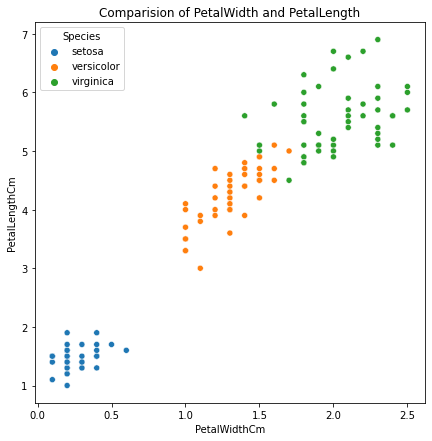

In [6]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='PetalWidthCm',
               y='PetalLengthCm',
               data=df,
               hue='Species')
plt.title('Comparision of PetalWidth and PetalLength')

* From the above data we can see that theya re alredy clusterd in to 3 so we can assume that we can hace 3 clusters 

### Lets start building the clusters 

In [7]:
from sklearn.cluster import KMeans

In [8]:
km=KMeans(n_clusters=3)
km


KMeans(n_clusters=3)

In [9]:
y_predicted=km.fit_predict(df.drop('Species',axis='columns'))

In [10]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [11]:
df['Predicted_cluster1']=y_predicted
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted_cluster1
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


Text(0.5, 1.0, 'Predicted Clusters_1')

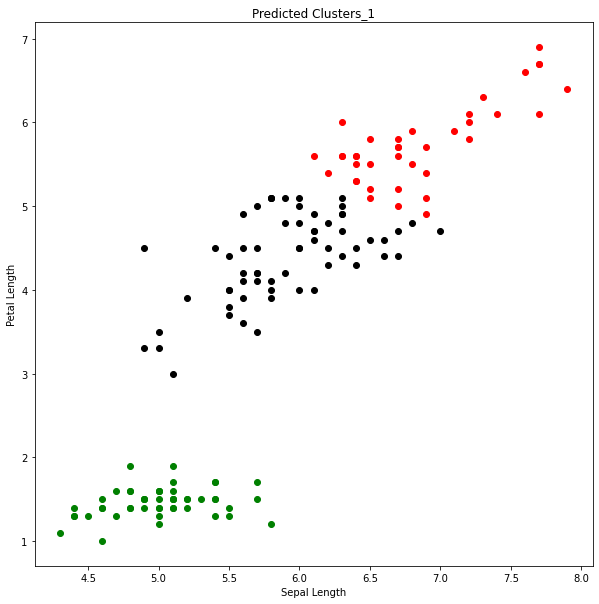

In [12]:
df1=df[df.Predicted_cluster1==0]
df2=df[df.Predicted_cluster1==1]
df3=df[df.Predicted_cluster1==2]
plt.figure(figsize=(10,10))
plt.scatter(df1.SepalLengthCm,df1.PetalLengthCm,color='black')
plt.scatter(df2.SepalLengthCm,df2.PetalLengthCm,color='green')
plt.scatter(df3.SepalLengthCm,df3.PetalLengthCm,color='red')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Predicted Clusters_1')


### **But the data above is not scaled , can create problems sometimes if the data is not scaled**
* So We will take two features 'SepalWidthCm' and 'SepallegthCm' for a better prediction 
* We will scale the thes two featrues by usin min max scaler , what it does is, it will transform the featrues between 0 and 1 .

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scale=MinMaxScaler()
scale.fit(df[['SepalLengthCm']])
df['SepalLengthCm']=scale.transform(df[['SepalLengthCm']])
scale.fit(df[['SepalWidthCm']])
df['SepalWidthCm']=scale.transform(df[['SepalWidthCm']])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted_cluster1
0,0.222222,0.625000,1.4,0.2,setosa,1
1,0.166667,0.416667,1.4,0.2,setosa,1
2,0.111111,0.500000,1.3,0.2,setosa,1
3,0.083333,0.458333,1.5,0.2,setosa,1
4,0.194444,0.666667,1.4,0.2,setosa,1


In [15]:
ypred_cluster2=km.fit_predict(df[['SepalLengthCm','SepalWidthCm']])
ypred_cluster2


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [16]:
df['Pred_cluster2']=ypred_cluster2
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted_cluster1,Pred_cluster2
0,0.222222,0.625000,1.4,0.2,setosa,1,2
1,0.166667,0.416667,1.4,0.2,setosa,1,2
2,0.111111,0.500000,1.3,0.2,setosa,1,2
3,0.083333,0.458333,1.5,0.2,setosa,1,2
4,0.194444,0.666667,1.4,0.2,setosa,1,2


Text(0.5, 1.0, 'Predicted Clusters_2')

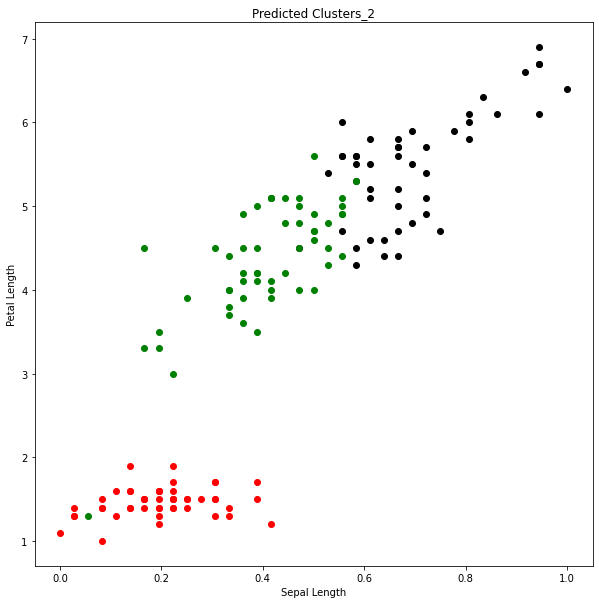

In [17]:
df4=df[df.Pred_cluster2==0]
df5=df[df.Pred_cluster2==1]
df6=df[df.Pred_cluster2==2]
plt.figure(figsize=(10,10))
plt.scatter(df4.SepalLengthCm,df4.PetalLengthCm,color='black')
plt.scatter(df5.SepalLengthCm,df5.PetalLengthCm,color='green')
plt.scatter(df6.SepalLengthCm,df6.PetalLengthCm,color='red')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Predicted Clusters_2')

### **We can see that one of the 'RED' datapoint it in the green cluster and there are few in the black region compared to the first prediction second prediction is not good so lets try and see if we predict the k values correctly**

**Predicting the values of k depends on the SSE=Sum of Square Error for each values of K , so lets draw a elbow chart to find the exact value of K**

In [18]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['SepalLengthCm','SepalWidthCm']])
    sse.append(km.inertia_)

In [19]:
sse

[12.746657664609057,
 6.850052259749757,
 4.131846697085131,
 3.2196860183926157,
 2.539179637092002,
 2.1057745262141627,
 1.8164199014442515,
 1.5285028949087358,
 1.2867152211321762]

Text(0, 0.5, 'SSE')

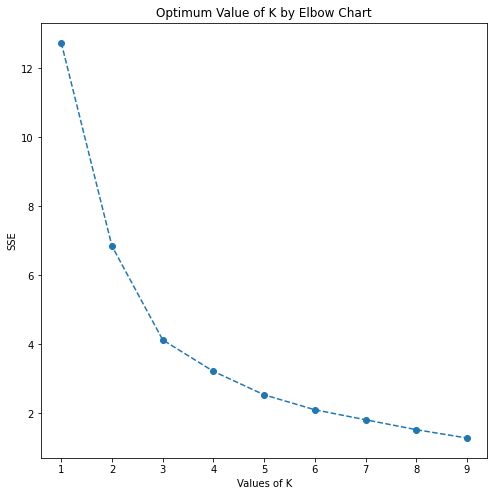

In [20]:
plt.figure(figsize=(8,8))
plt.plot(k_range,sse,linestyle='--',Marker='o')
plt.title('Optimum Value of K by Elbow Chart')
plt.xlabel('Values of K')
plt.ylabel('SSE')

- **we can see that elbow chart clearly states 3 would be the best values of K as it starts bending at that point**

- **As we have only features standerdized lets do the same to the other featres and predict the cluster** 

In [21]:
scale.fit(df[['PetalLengthCm']])
df['PetalLengthCm']=scale.transform(df[['PetalLengthCm']])
scale.fit(df[['PetalWidthCm']])
df['PetalWidthCm']=scale.transform(df[['PetalWidthCm']])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted_cluster1,Pred_cluster2
0,0.222222,0.625000,0.067797,0.041667,setosa,1,2
1,0.166667,0.416667,0.067797,0.041667,setosa,1,2
2,0.111111,0.500000,0.050847,0.041667,setosa,1,2
3,0.083333,0.458333,0.084746,0.041667,setosa,1,2
4,0.194444,0.666667,0.067797,0.041667,setosa,1,2


In [22]:
fin_df=df.drop(['Species','Predicted_cluster1','Pred_cluster2'],axis='columns')
fin_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [23]:
km3=KMeans(n_clusters=3)
Final_cluster=km3.fit_predict(fin_df)
Final_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [24]:
fin_df['Cluster']=Final_cluster

In [25]:
fin_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,0
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,0
148,0.527778,0.583333,0.745763,0.916667,0


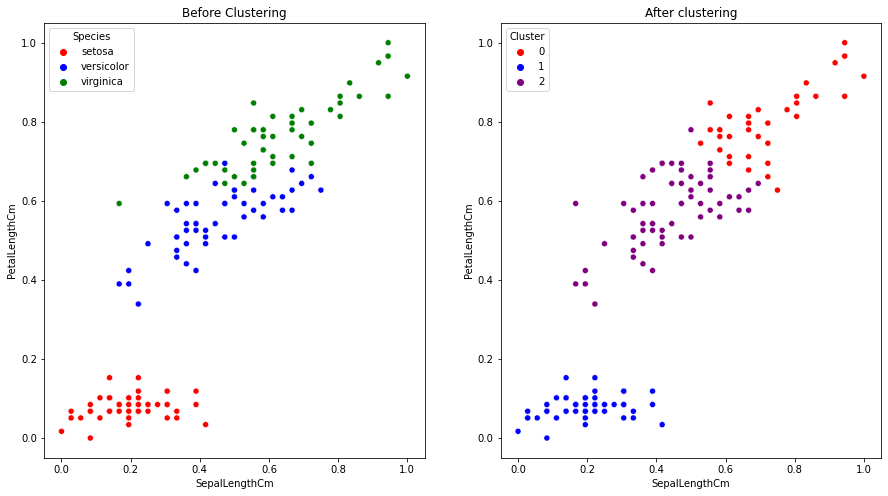

In [26]:
plt.rcParams['figure.figsize'] = (15,8)
plt.subplot(1,2,1)
plt.title('Before Clustering')
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',hue='Species',data=df,
                palette=['red','blue','green'])
plt.subplot(1,2,2)
plt.title('After clustering')
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',hue='Cluster',data=fin_df,
                palette=['red','blue','purple'])
plt.show()

## **Lets also draw the CENTROIDS** 

In [27]:
km3.cluster_centers_

array([[0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.19611111, 0.59083333, 0.07864407, 0.06      ],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033]])